In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
pip install --upgrade transformers


In [ ]:
pip install transformers[torch]

In [ ]:
pip install transformers torch


**1. Import dataset from Google Drive**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My Drive/Research P1

/content/drive/My Drive/Research P1


In [ ]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('Suicide_Detection.csv')



**2. Exploratory Data Analysis**

In [ ]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
df['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

In [ ]:
df['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


2.1 No null value found

In [ ]:
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

2.2 Check if there is any huge imbalance between "Suicide"and "Non-suicide"

In [ ]:
import plotly.express as plx

plx.bar(df,x=df['class'].value_counts().index.values,
        y=df['class'].value_counts(),color=['Suicide','Not Suicide'])


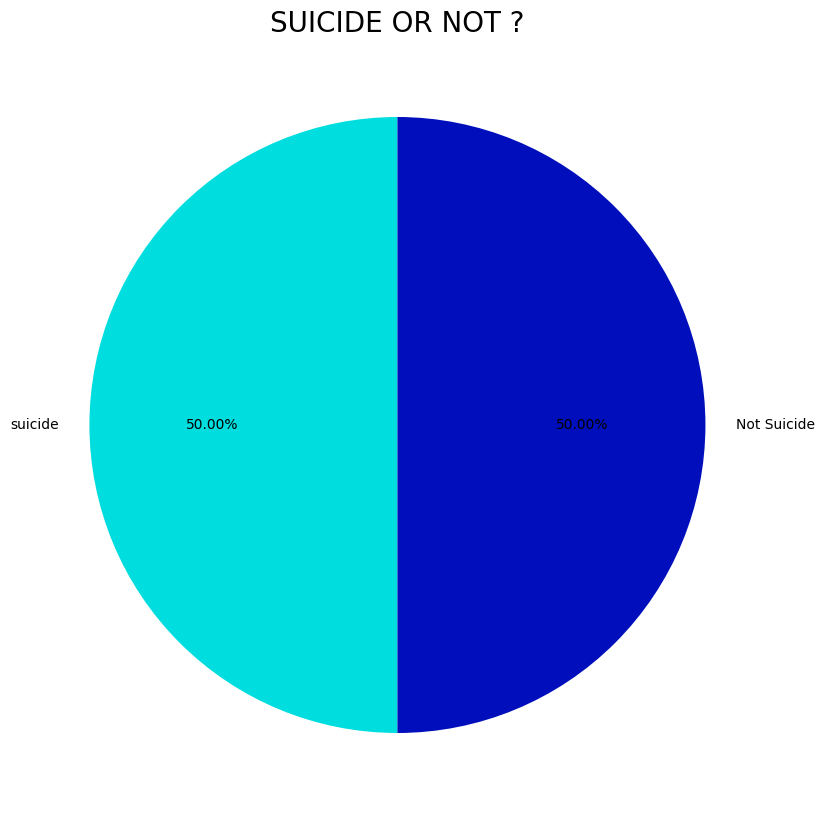

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.pie(df['class'].value_counts(),startangle=90,colors=['#00dddf','#000fbb'],
        autopct='%0.2f%%',labels=['suicide','Not Suicide'])
plt.title('SUICIDE OR NOT ?',fontdict={'size':20})
plt.show()

2.3 Check if there is any duplication

In [ ]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Display the duplicate rows
duplicate_data = df[duplicate_rows]

print(f"Number of duplicate rows: {num_duplicates}")
print("Duplicate rows:")
print(duplicate_data)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Unnamed: 0, text, class]
Index: []


2.4 Check word frequency for suicide

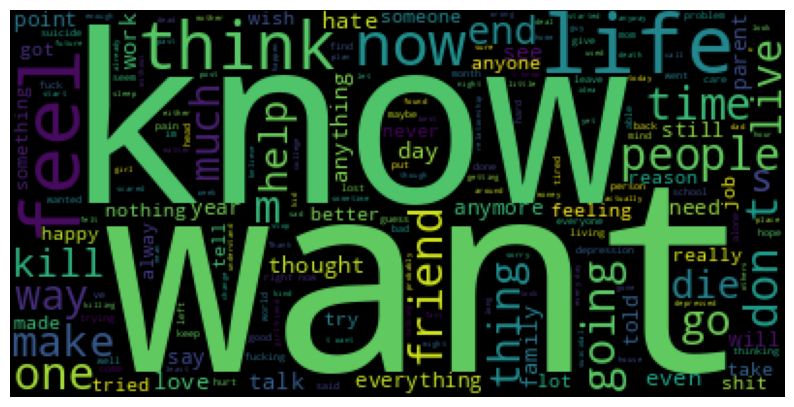

In [ ]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

suicide=df[df['class']=='suicide']['text']
xsuicide=df[df['class']=='non-suicide']['text']

def display_cloud(data):
    plt.subplots(figsize=(10,10))
    wc = wordcloud.WordCloud(
                   background_color="black",
                   colormap='viridis',
                   max_words=1000,
                   random_state=24)
    plt.imshow(wc.generate(' '.join(data)))
    plt.axis('off')
    plt.show()

display_cloud(suicide)

2.5 Check word frequency for non-suicide

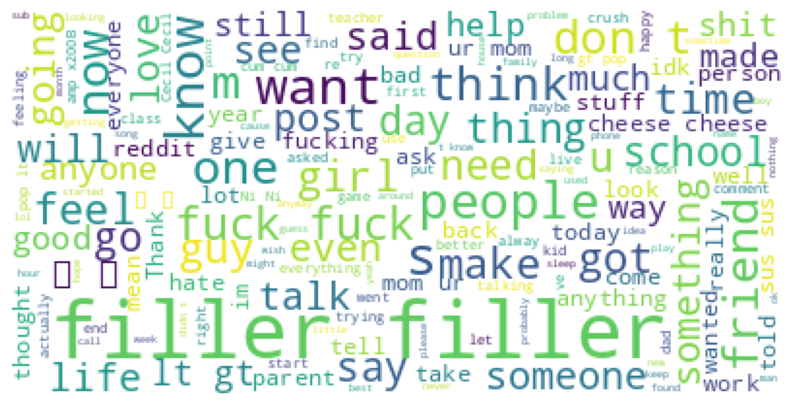

In [ ]:
def display_cloud1(data):
    plt.subplots(figsize=(10,10))
    wc = wordcloud.WordCloud(
                   background_color="white",
                   max_words=1000,
                   random_state=24)
    plt.imshow(wc.generate(' '.join(data)))
    plt.axis('off')
    plt.show()

display_cloud1(xsuicide)

2.6 Check text length for suicide and non-suicide

<ipython-input-17-b922c1616107>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-17-b922c1616107>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




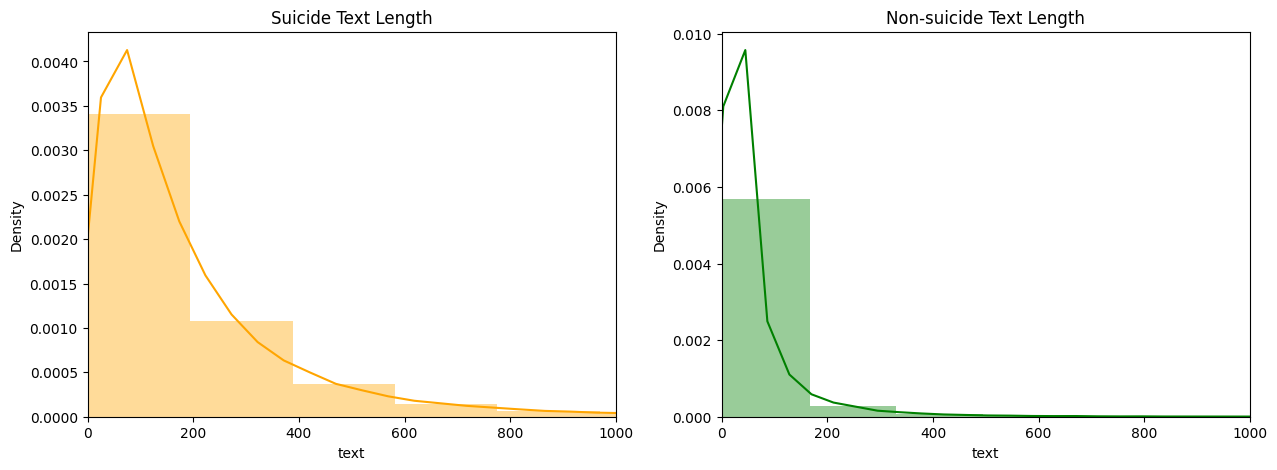

In [ ]:
import seaborn as sns
#Analyse the count of words in each segment- both positive and negative reviews
# Function for checking word length
def cal_len(data):
    return len(data)

# Create generic plotter with Seaborn
def plot_count(count_suicide, count_xsuicide, xlim_range=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(count_suicide, ax=ax1, color='Orange')
    ax1.set_title("Suicide Text Length")

    sns.distplot(count_xsuicide, ax=ax2, color='Green')
    ax2.set_title("Non-suicide Text Length")

    # Set x-axis range if specified
    if xlim_range:
        ax1.set_xlim(xlim_range)
        ax2.set_xlim(xlim_range)

    plt.show()

# Assuming you want to set the x-axis range from 0 to 1000
xlim_range = (0, 1000)

count_suicide_words = suicide.str.split().apply(lambda z: cal_len(z))
count_xsuicide_words = xsuicide.str.split().apply(lambda z: cal_len(z))

plot_count(count_suicide_words, count_xsuicide_words, xlim_range)

# Data Pre-processing

**3. Data Pre-processing**

In [ ]:
import pandas as pd

# Mapping 'Suicide' to 1 and 'Non-suicide' to 0
label_mapping = {'suicide': 1, 'non-suicide': 0}
df['class'] = df['class'].map(label_mapping)

print(df)


        Unnamed: 0                                               text  class
0                2  Ex Wife Threatening SuicideRecently I left my ...      1
1                3  Am I weird I don't get affected by compliments...      0
2                4  Finally 2020 is almost over... So I can never ...      0
3                8          i need helpjust help me im crying so hard      1
4                9  I’m so lostHello, my name is Adam (16) and I’v...      1
...            ...                                                ...    ...
232069      348103  If you don't like rock then your not going to ...      0
232070      348106  You how you can tell i have so many friends an...      0
232071      348107  pee probably tastes like salty tea😏💦‼️ can som...      0
232072      348108  The usual stuff you find hereI'm not posting t...      1
232073      348110  I still haven't beaten the first boss in Hollo...      0

[232074 rows x 3 columns]


In [ ]:
preprocessed_df = df.copy()

In [ ]:
preprocessed_df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,1
1,3,Am I weird I don't get affected by compliments...,0
2,4,Finally 2020 is almost over... So I can never ...,0
3,8,i need helpjust help me im crying so hard,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",1


Data partition: 80% training, 20% test

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(preprocessed_df, test_size=0.2, random_state=42, stratify=preprocessed_df['class'])


print("Training set label distribution:\n", train_data['class'].value_counts(normalize=True))
print("\nTest set label distribution:\n", test_data['class'].value_counts(normalize=True))




Training set label distribution:
 class
1    0.500003
0    0.499997
Name: proportion, dtype: float64

Test set label distribution:
 class
0    0.500011
1    0.499989
Name: proportion, dtype: float64


In [ ]:
train_text = train_data['text'].tolist()
train_label = train_data['class'].tolist()

test_text = test_data['text'].tolist()
test_label = test_data['class'].tolist()


In [ ]:
pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 42.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_metric
import numpy as np

# Load the metrics
accuracy_metric = load_metric("accuracy")
precision_metric = load_metric("precision")
recall_metric = load_metric("recall")
f1_metric = load_metric("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"],
        'precision': precision_metric.compute(predictions=predictions, references=labels, average='binary')["precision"],
        'recall': recall_metric.compute(predictions=predictions, references=labels, average='binary')["recall"],
        'f1': f1_metric.compute(predictions=predictions, references=labels, average='binary')["f1"],
    }



<ipython-input-11-83eb5358629a>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


# Experiment 1: Electra

1. ELECTRA

In [ ]:
from transformers import ElectraTokenizer, ElectraForSequenceClassification
from transformers import Trainer, TrainingArguments

electratokenizer = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')
electramodel = ElectraForSequenceClassification.from_pretrained('google/electra-small-discriminator', num_labels=2)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Tokenize the texts
train_encodings = electratokenizer(train_text, truncation=True, padding=True, max_length=128)
test_encodings = electratokenizer(test_text, truncation=True, padding=True, max_length=128)

# Create torch datasets
train_dataset = Dataset(train_encodings, train_label)
test_dataset = Dataset(test_encodings, test_label)


In [ ]:
training_args_electra = TrainingArguments(
    output_dir='./results',          # output directory for model checkpoints
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
     evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)


In [ ]:
trainer_electra = Trainer(
    model=electramodel,
    args=training_args_electra,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer_electra.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.127900,0.089309,0.971949,0.971745,0.972164,0.971954
2,0.047800,0.103564,0.974900,0.971426,0.978584,0.974992
3,0.051900,0.109351,0.975374,0.968569,0.982635,0.975551


TrainOutput(global_step=34812, training_loss=0.09147543854079446, metrics={'train_runtime': 1643.2244, 'train_samples_per_second': 338.954, 'train_steps_per_second': 21.185, 'total_flos': 4096515822921216.0, 'train_loss': 0.09147543854079446, 'epoch': 3.0})

In [ ]:
trainer_electra.evaluate()


{'eval_loss': 0.6999422907829285,
 'eval_accuracy': 0.4839814715070559,
 'eval_precision': 0.4747953176804926,
 'eval_recall': 0.3023786951650435,
 'eval_f1': 0.3694616295906279,
 'eval_runtime': 18.2788,
 'eval_samples_per_second': 2539.274,
 'eval_steps_per_second': 39.718,
 'epoch': 3.0}

# Experiment 2: Albert

2. ALBERT

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from transformers import Trainer, TrainingArguments

alberttokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
albertmodel = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)  # Adjust `num_labels` based on your task


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)



# Tokenize the whole dataset
train_encodings_alb = alberttokenizer(train_text, padding=True, truncation=True, max_length=512, return_tensors="pt")
test_encodings_alb = alberttokenizer(test_text, padding=True, truncation=True, max_length=512, return_tensors="pt")


# Create torch datasets
train_dataset_alb = CustomDataset(train_encodings_alb, train_label)
test_dataset_alb  = CustomDataset(test_encodings_alb, test_label)



In [ ]:
training_args_alb = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
     evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

trainer_alb = Trainer(
    model=albertmodel,
    args=training_args_alb,
    train_dataset=train_dataset_alb,
    eval_dataset=test_dataset_alb,
     compute_metrics=compute_metrics,
)

trainer_alb.train()


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
<ipython-input-15-dee4029be847>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.048000,0.090344,0.980911,0.991327,0.970311,0.980706
2,0.039500,0.058594,0.984876,0.984499,0.985263,0.984881
3,0.039800,0.063200,0.986082,0.988439,0.983669,0.986048


<ipython-input-15-dee4029be847>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-15-dee4029be847>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=34812, training_loss=0.07595125144285361, metrics={'train_runtime': 17928.6288, 'train_samples_per_second': 31.066, 'train_steps_per_second': 1.942, 'total_flos': 1.331069302397952e+16, 'train_loss': 0.07595125144285361, 'epoch': 3.0})

In [ ]:
trainer_alb.evaluate()

<ipython-input-49-8a8da722a71a>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.6931478977203369,
 'eval_accuracy': 0.500032317138856,
 'eval_precision': 0.0,
 'eval_recall': 0.0,
 'eval_f1': 0.0,
 'eval_runtime': 350.8622,
 'eval_samples_per_second': 132.288,
 'eval_steps_per_second': 2.069,
 'epoch': 3.0}

# Experiment 3: RoBERTa

3. RoBERTa

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import Trainer, TrainingArguments

tokenizer = RobertaTokenizer.from_pretrained('Roberta-base')
robertamodel = RobertaForSequenceClassification.from_pretrained('Roberta-base', num_labels=2)  # Adjust `num_labels` based on your task




/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at Roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors="pt")
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Convert DataFrame to dataset
train_dataset_rob = TextDataset(train_text, train_label, tokenizer)
test_dataset_rob = TextDataset(test_text, test_label, tokenizer)


In [ ]:
import torch

training_args_rob = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
     evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

trainer_rob = Trainer(
    model=robertamodel,
    args=training_args_rob,
    train_dataset=train_dataset_rob,
    eval_dataset=test_dataset_rob,
     compute_metrics=compute_metrics,
)

trainer_rob.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.695700,0.704688,0.499989,0.499989,1.000000,0.666657
2,0.062200,0.106317,0.974254,0.989286,0.958892,0.973852
3,0.049100,0.036701,0.990542,0.992260,0.988796,0.990525


TrainOutput(global_step=34812, training_loss=0.18711016679941134, metrics={'train_runtime': 13586.1598, 'train_samples_per_second': 40.996, 'train_steps_per_second': 2.562, 'total_flos': 1.4654680628124672e+17, 'train_loss': 0.18711016679941134, 'epoch': 3.0})

In [ ]:
trainer_rob.save_model("/content/drive/My Drive/Research P1/RoBERTa2")

In [ ]:
        # Saving the tokenizer
        tokenizer.save_pretrained("/content/drive/My Drive/Research P1/RoBERTa2")
        print("saved tokenizer")

saved tokenizer


# Experiment 4: GPT-2

4. GPT-2

In [ ]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
from transformers import Trainer, TrainingArguments

gpttokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gptmodel = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)  # Assuming binary classification


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch

class SuicideDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Set tokenizer padding token
gpttokenizer.pad_token = gpttokenizer.eos_token


# Tokenize the whole dataset
train_encodings_gpt = gpttokenizer(train_text, padding=True,return_tensors="pt", truncation=True, max_length=512)
test_encodings_gpt = gpttokenizer(test_text, padding=True, return_tensors="pt",truncation=True, max_length=512)


# Create torch datasets
train_dataset_gpt = SuicideDataset(train_encodings_gpt, train_label)
test_dataset_gpt = SuicideDataset(test_encodings_gpt,test_label)


In [ ]:
# Ensure the model's embedding size matches the tokenizer
gptmodel.config.pad_token_id = gpttokenizer.pad_token_id

training_args_gpt = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
     evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

trainer_gpt = Trainer(
    model=gptmodel,
    args=training_args_gpt,
    train_dataset=train_dataset_gpt,
     eval_dataset=test_dataset_gpt,
     compute_metrics=compute_metrics,
)

trainer_gpt.train()


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
<ipython-input-12-4dac3abe5082>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.037300,0.043915,0.990326,0.996900,0.983712,0.990262
2,0.000600,0.037749,0.992804,0.996699,0.988883,0.992776
3,0.007400,0.033544,0.993881,0.996405,0.991339,0.993866


<ipython-input-12-4dac3abe5082>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-12-4dac3abe5082>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=34812, training_loss=0.036355187288342736, metrics={'train_runtime': 37349.0668, 'train_samples_per_second': 14.913, 'train_steps_per_second': 0.932, 'total_flos': 1.455362802544804e+17, 'train_loss': 0.036355187288342736, 'epoch': 3.0})

In [ ]:
trainer_gpt.evaluate()

<ipython-input-12-4dac3abe5082>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.033543508499860764,
 'eval_accuracy': 0.9938812883766024,
 'eval_precision': 0.996405214604357,
 'eval_recall': 0.9913388201835653,
 'eval_f1': 0.9938655607395886,
 'eval_runtime': 956.4443,
 'eval_samples_per_second': 48.529,
 'eval_steps_per_second': 0.759,
 'epoch': 3.0}

In [ ]:
trainer_gpt.save_model("/content/drive/My Drive/Research P1")

NameError: name 'trainer_gpt' is not defined

In [ ]:
        # Saving the tokenizer
        gpttokenizer.save_pretrained("/content/drive/My Drive/Research P1")
        print("saved tokenizer")

saved tokenizer


In [ ]:
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer

# Path where your model and tokenizer are saved
model_path = "/content/drive/My Drive/Research P1"

# Load the model
model = GPT2ForSequenceClassification.from_pretrained(model_path)

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained(model_path)



In [ ]:
import torch

def predict_suicide_ideation(text):
    # Encode the text using the tokenizer
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding=True)

    # Move inputs to the same device as model
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Get model predictions
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=1)

    # Return whether the text is classified as suicidal (1) or not suicidal (0)
    return 'Suicidal' if predictions[0].item() == 1 else 'Non-Suicidal'


In [ ]:
# Example of using the function
test_text = "i want to die"
prediction = predict_suicide_ideation(test_text)
print(f"The text is classified as: {prediction}")


The text is classified as: Suicidal


In [ ]:
predictions

tensor([[11]])

In [ ]:
import torch.nn.functional as F

# Apply softmax to logits
probs = F.softmax(logits, dim=-1)

# Get the predicted class
predicted_class = torch.argmax(probs, dim=-1)
